# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [28]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Your code here

# Mount Google Drive to access the data file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Load the data
data_path = '/content/drive/My Drive/assignment2_data_2024.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

       label         mean radius  mean texture  mean perimeter   mean area  \
0  malignant  15.494653829645529     15.902542      103.008265  776.437239   
1  malignant  16.229870799611437     18.785613      105.176755  874.712003   
2  malignant   16.34567074196476     20.114076      107.083804  872.563251   
3   maligant  13.001009157806651     19.876997       85.889775  541.281012   
4  malignant  16.416060073302194     17.397533      107.857386  891.516818   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0         0.104239          0.168660        0.170572             0.085668   
1         0.091843          0.092548        0.081681             0.053670   
2         0.099924          0.123799        0.128788             0.078310   
3         0.113423          0.173069        0.146214             0.069574   
4         0.097321          0.111530        0.125971             0.068575   

   mean symmetry  ...  radius error  texture error  perimeter error 

In [31]:
data.describe()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [33]:
# Correct the misspelled label
data['label'] = data['label'].replace('maligant', 'malignant')
data.label.unique()
data.isnull().sum()

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64

In [34]:
# Handle missing value in 'symmetry error' by replacing NaN with the mean of the column
data['symmetry error'].fillna(data['symmetry error'].mean(), inplace=True)

data.isna().sum()

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
dtype: int64

<Axes: >

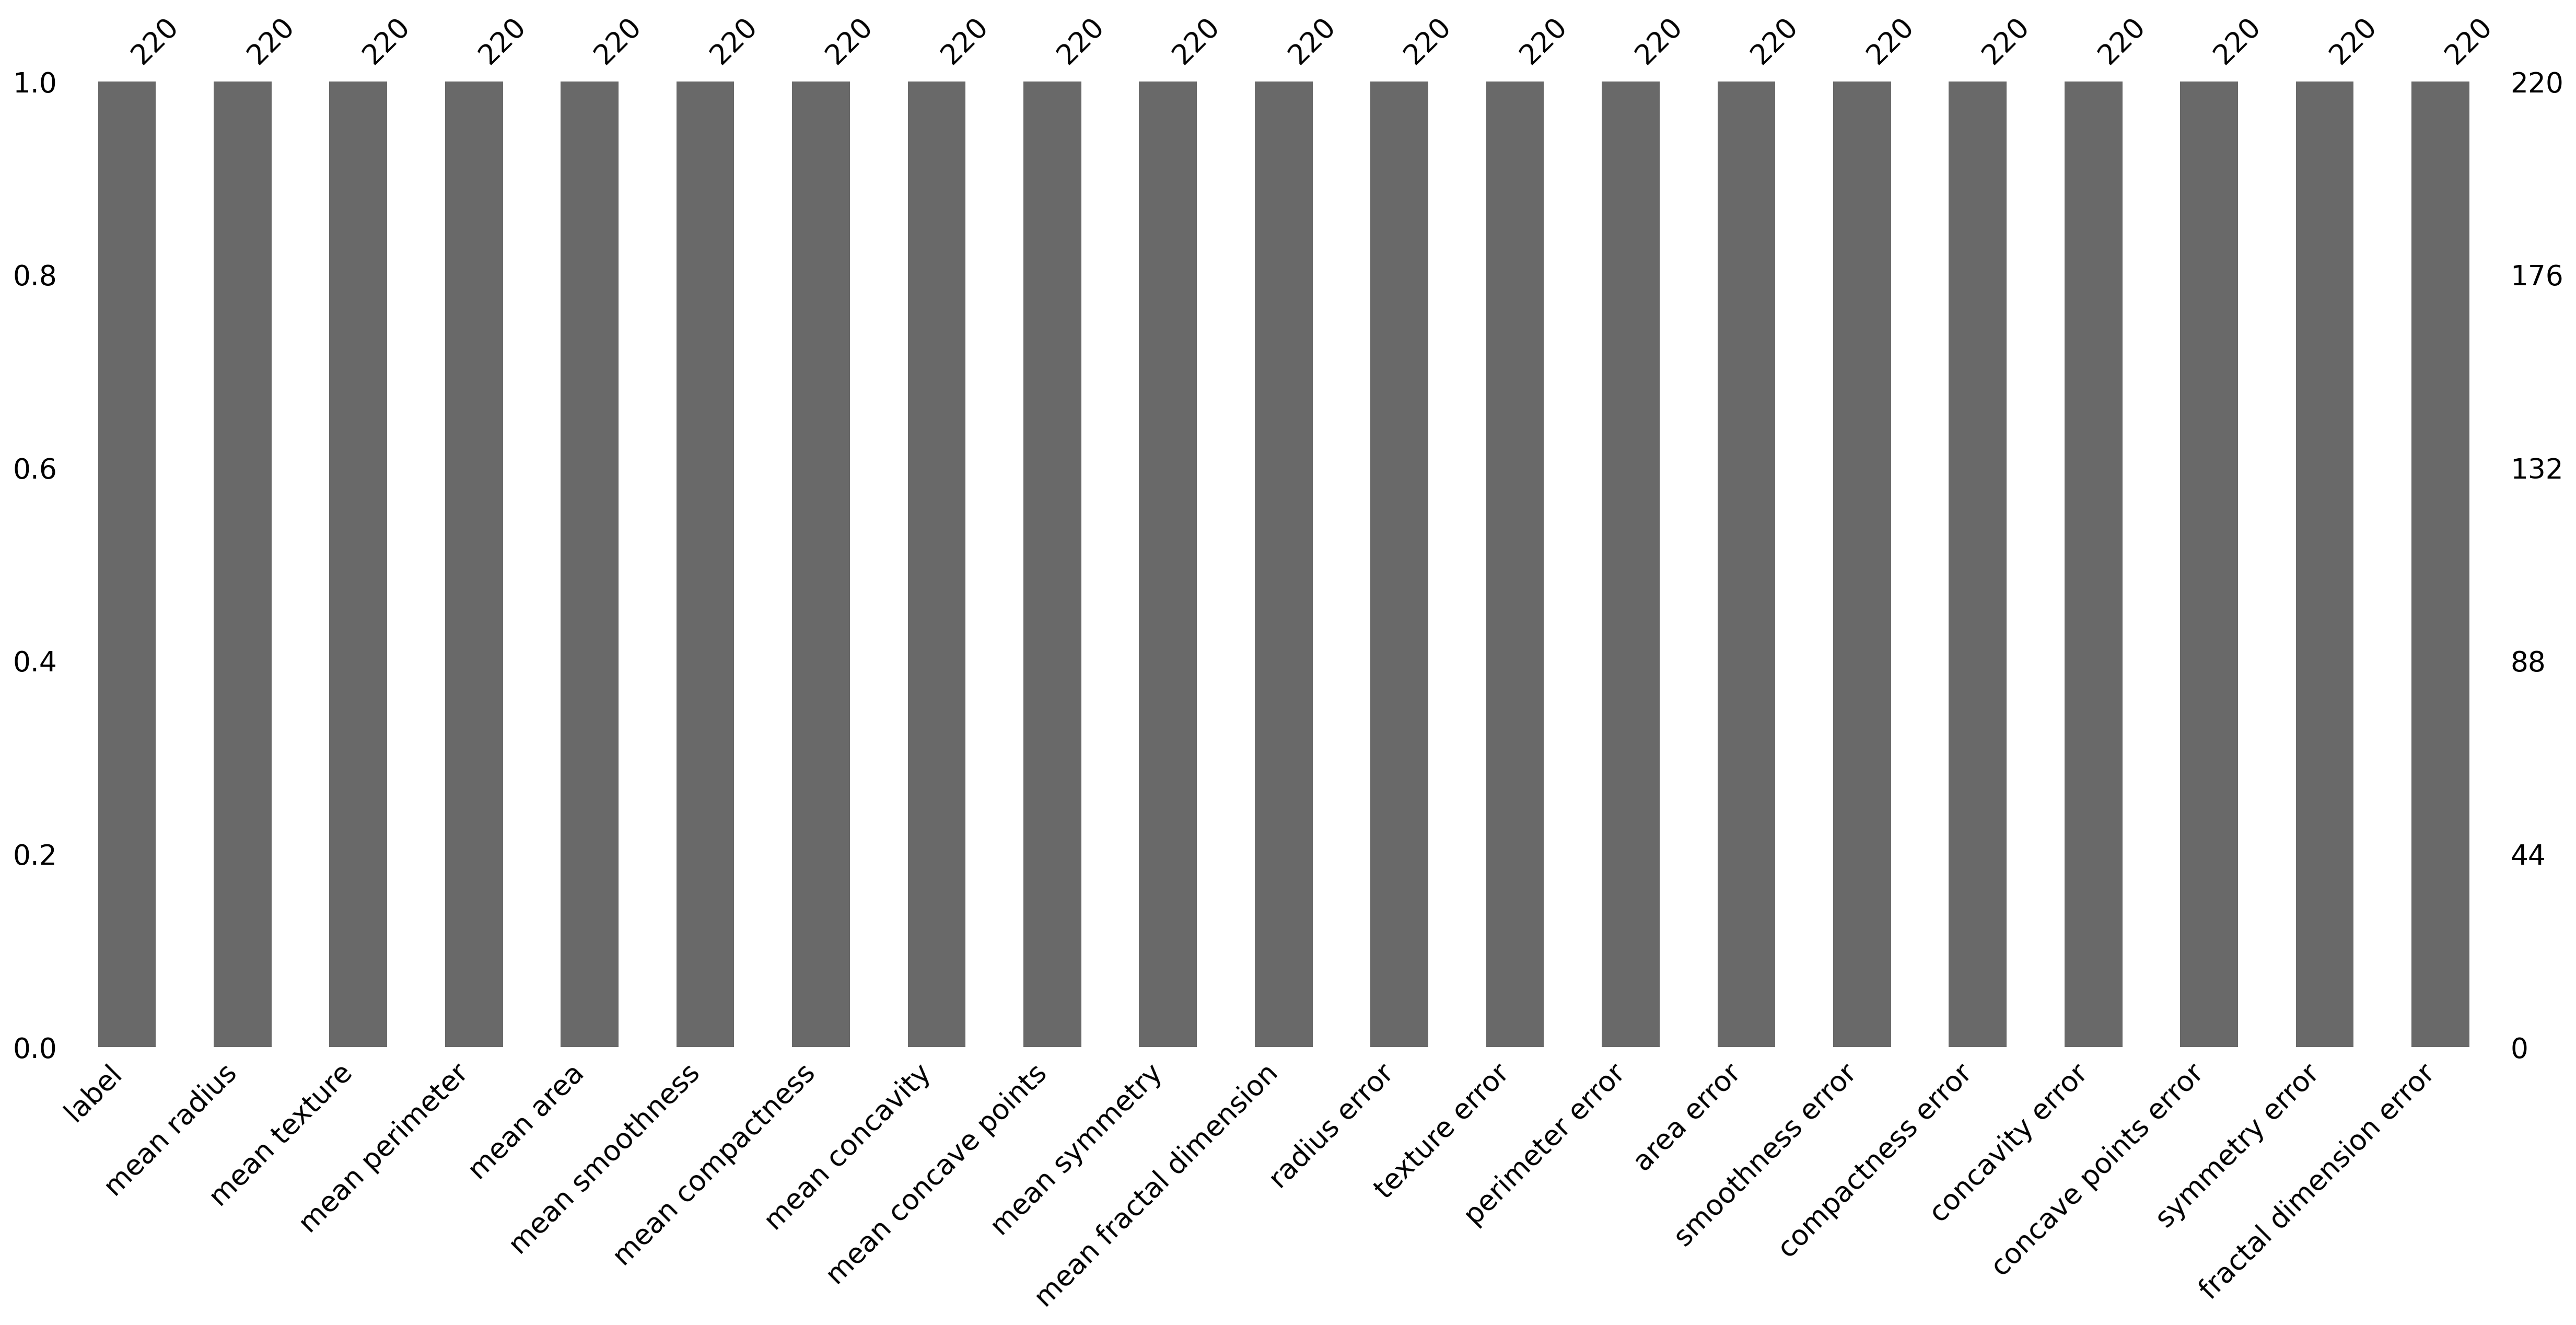

In [35]:
# visualizing null values

import missingno as msno
msno.bar(data)

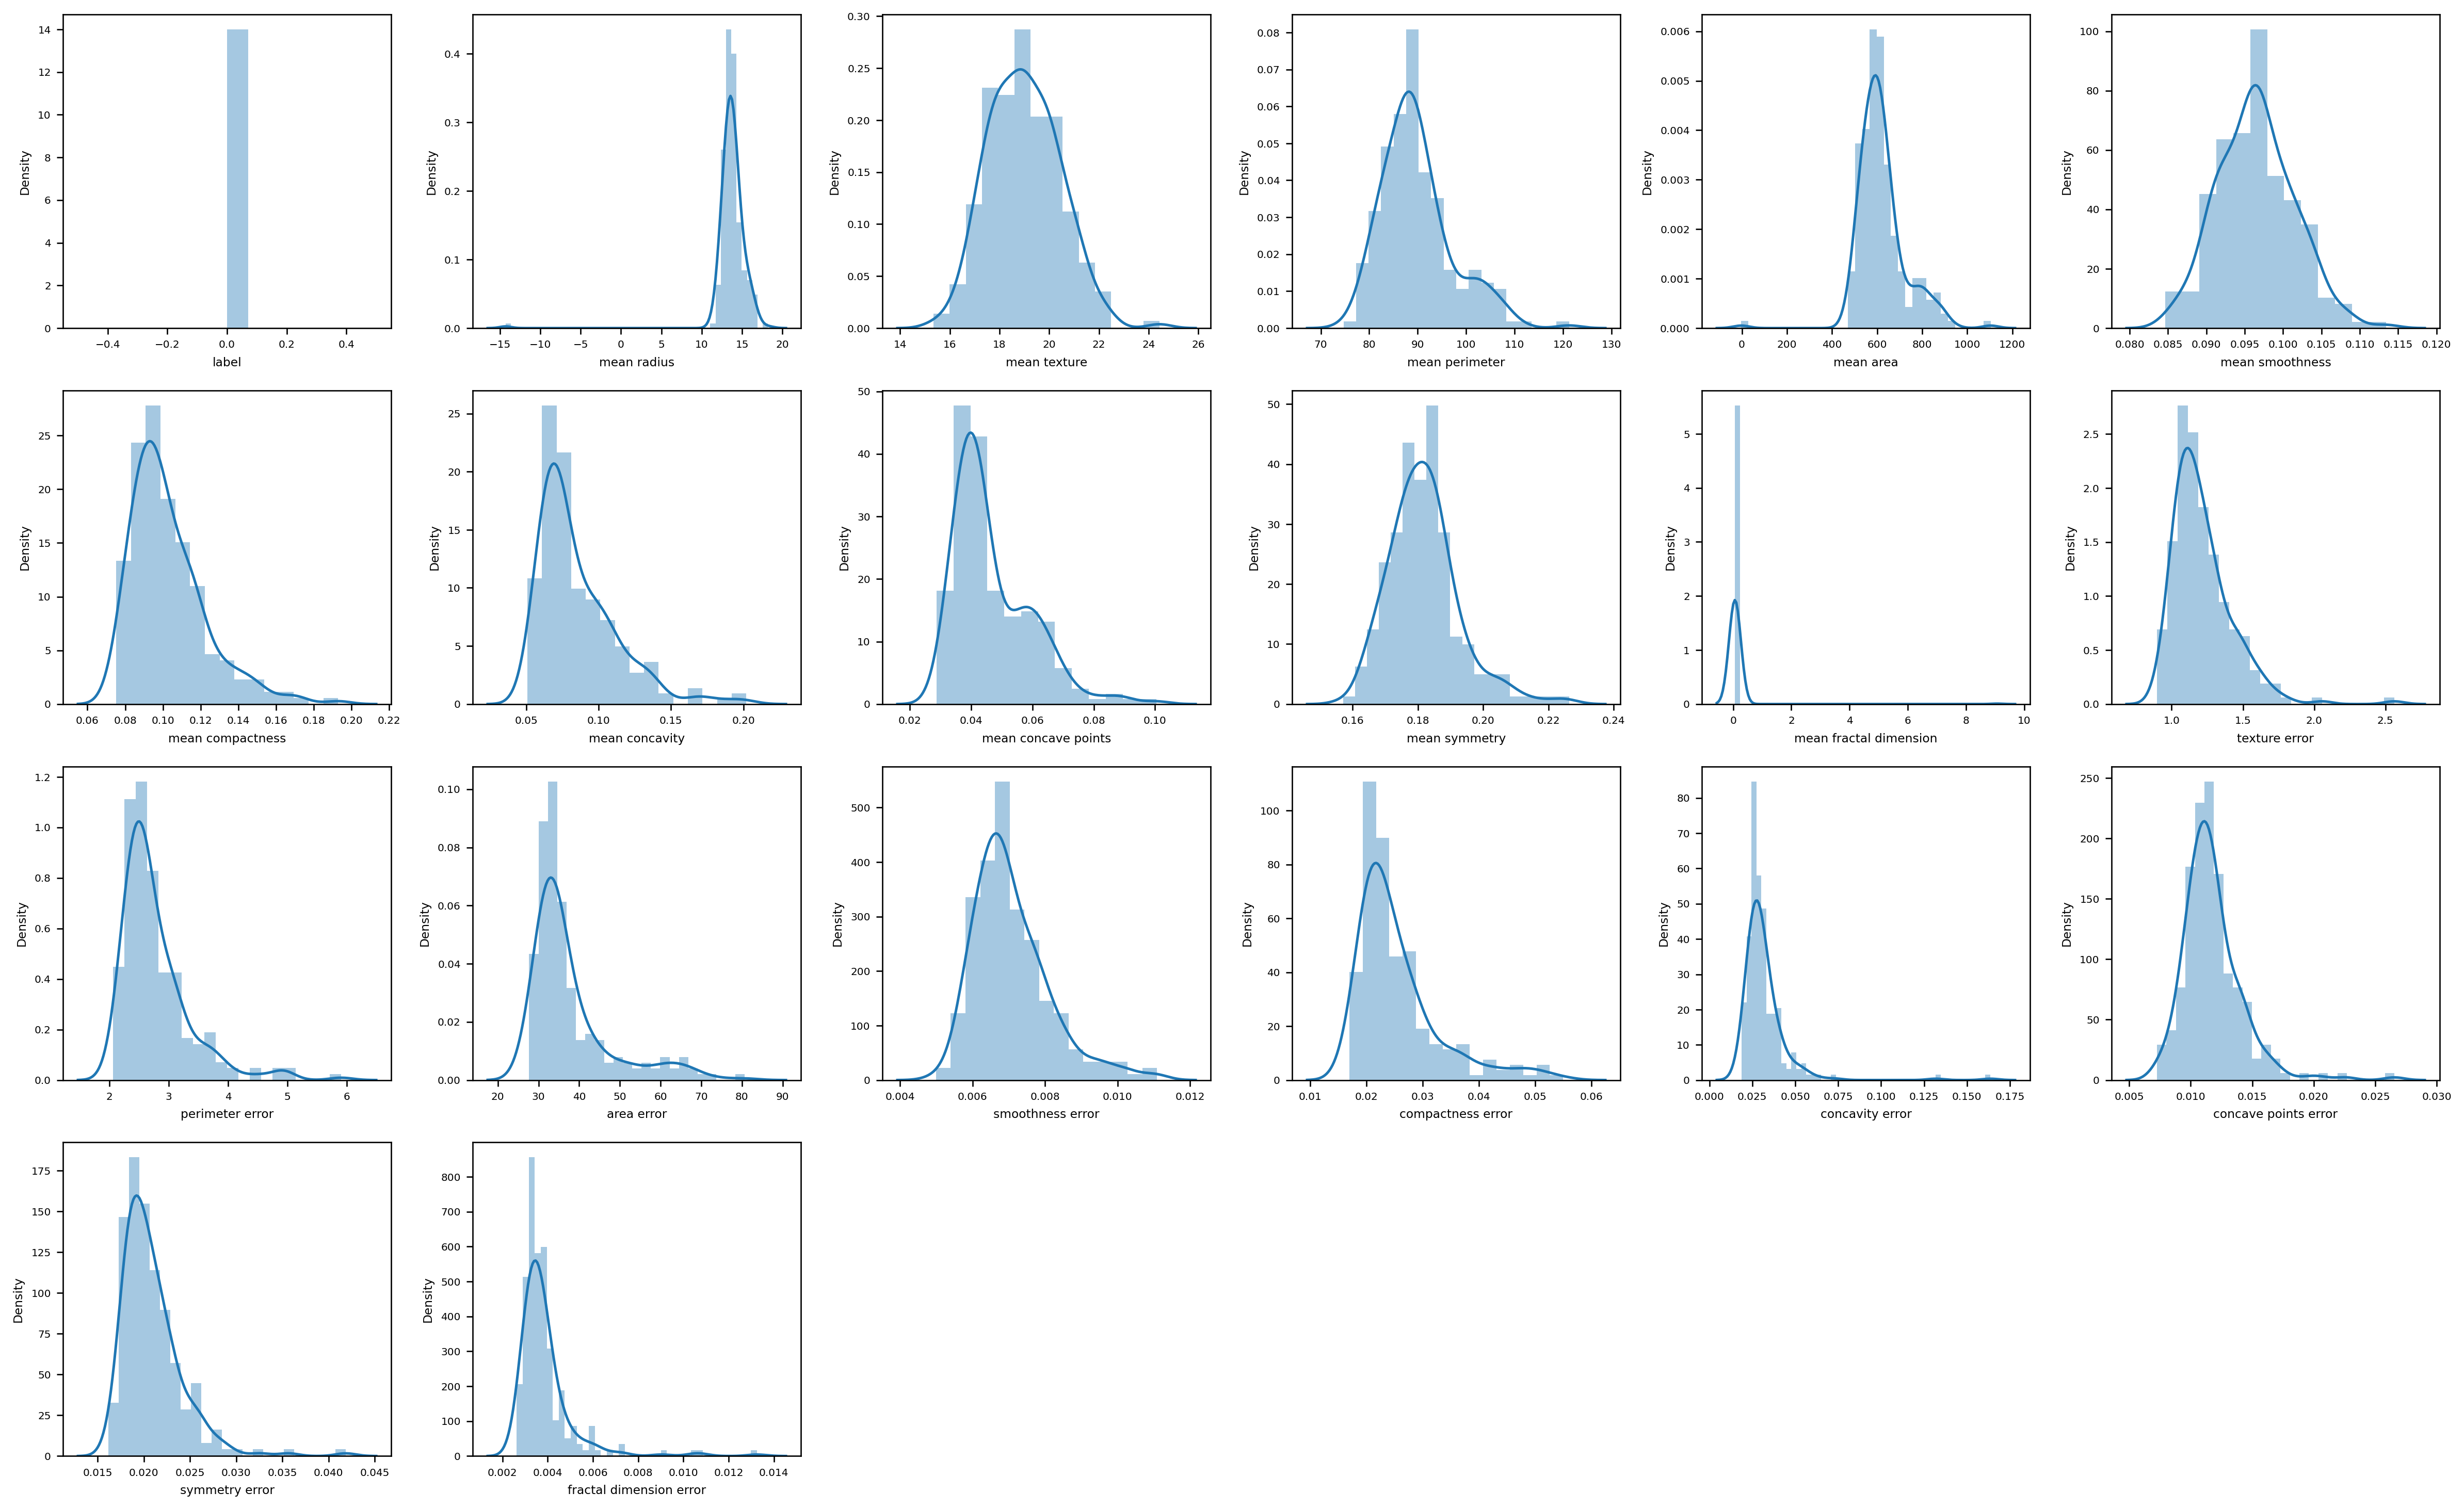

In [53]:
# Convert 'label' to numeric values
data['label'] = data['label'].apply(lambda val: 1 if val == 'malignant' else 0)

# Convert all feature columns to numeric
label_name = 'label'
feature_names = data.columns.drop(label_name)
data[feature_names] = data[feature_names].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        axis = plt.subplot(5, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

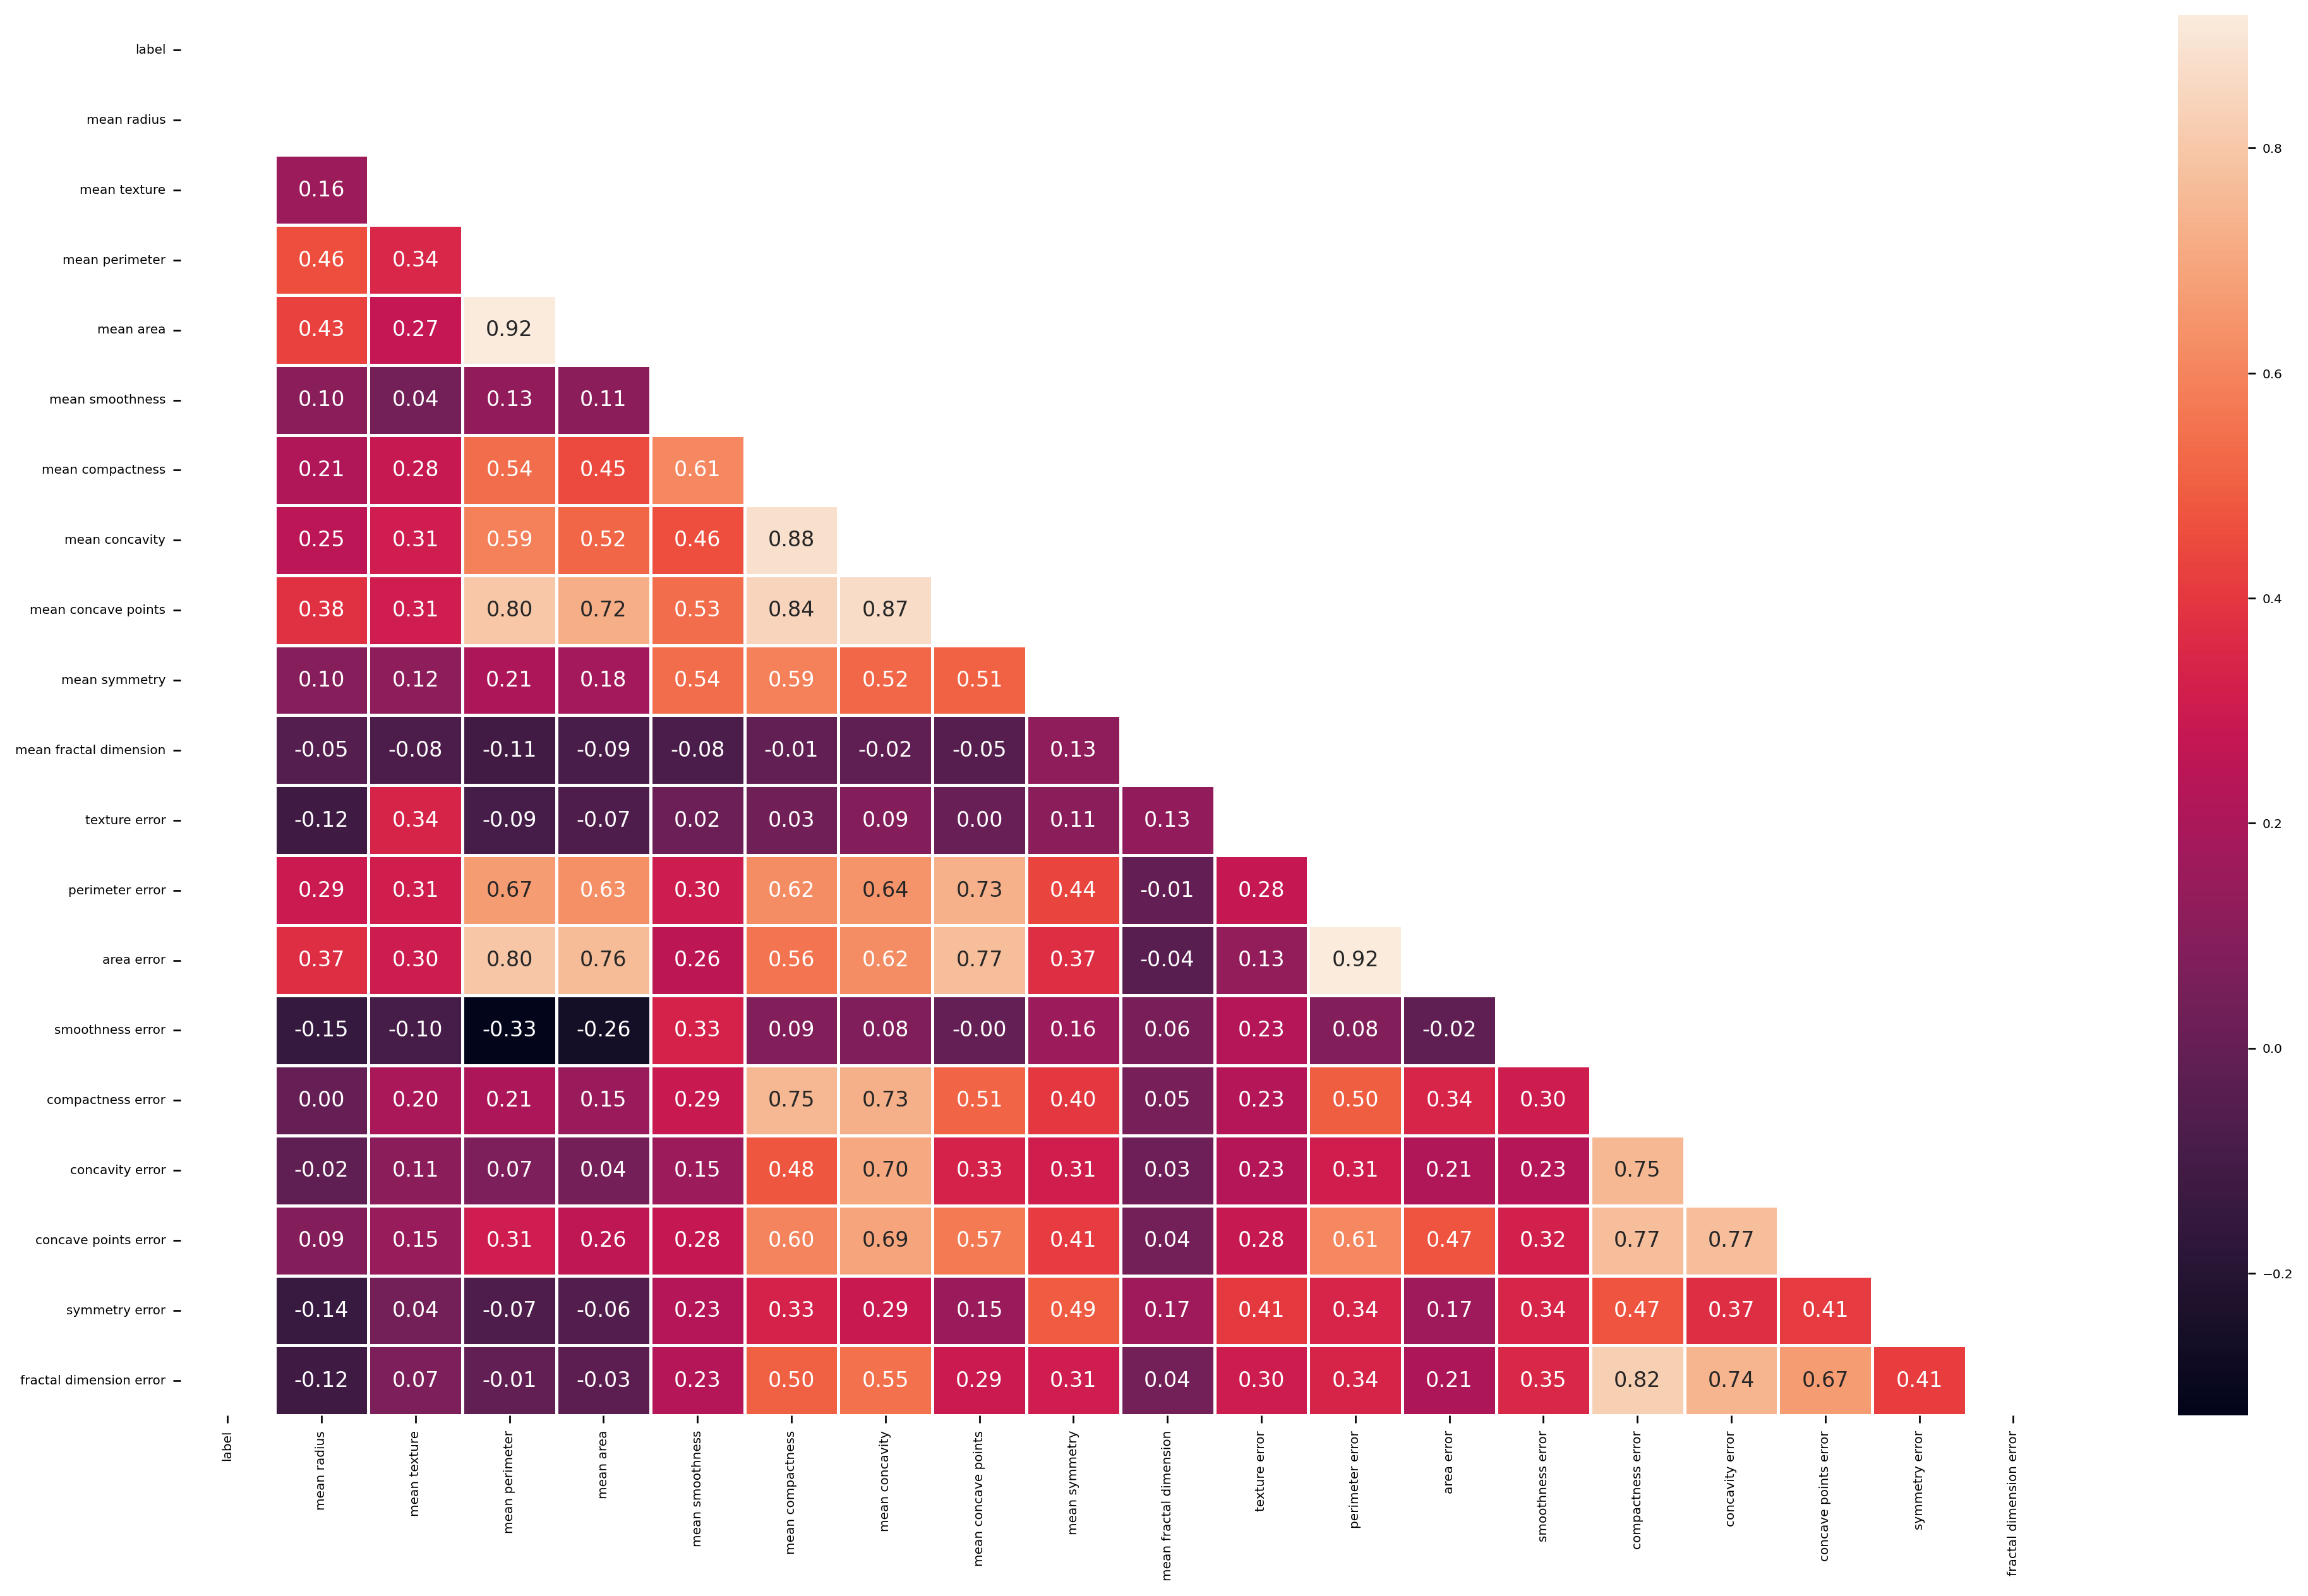

In [54]:
# heatmap to understand the relation between features
plt.figure(figsize = (20, 12))
corr = data.corr()
m = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = m, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [38]:
# removing highly correlated features
corr_matrix = data.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]
data = data.drop(to_drop, axis = 1)
print(f"{data.shape[1]} columns exists now.")

20 columns exists now.


## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [39]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [40]:
# Your code here

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import fbeta_score
from sklearn.linear_model import SGDClassifier

In [41]:
X = data.drop('label', axis = 1)
y = data['label']

In [42]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

# Split the data with stratify option to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import fbeta_score

# Drop rows with any missing values
data_cleaned = data.dropna()

# Check class distribution before splitting
print("Class distribution before splitting:")
print(data_cleaned['label'].value_counts())

# Define features and labels
X = data_cleaned.drop('label', axis=1)
y = data_cleaned['label']

# Split the data with stratify option to maintain class proportions
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of classes after splitting
print("Class distribution in y_train:")
print(y_train.value_counts())
print("Class distribution in y_test:")
print(y_test.value_counts())

# Ensure that y_train contains more than one class
if len(np.unique(y_train)) == 1:
    raise ValueError("y_train contains only one class after splitting. Check the stratify parameter and class distribution.")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement a simple random baseline model
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train_scaled, y_train)
y_pred_dummy = dummy_clf.predict(X_test_scaled)

# Function to safely calculate AUC
def safe_roc_auc_score(y_true, y_pred):
    if len(np.unique(y_true)) == 1:
        return "Undefined (only one class present)"
    return roc_auc_score(y_true, y_pred)

# Measure baseline performance
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_dummy),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_dummy),
    "Recall": recall_score(y_test, y_pred_dummy),
    "Precision": precision_score(y_test, y_pred_dummy),
    "AUC": safe_roc_auc_score(y_test, y_pred_dummy),
    "F1 Score": f1_score(y_test, y_pred_dummy),
    "F0.1 Score": fbeta_score(y_test, y_pred_dummy, beta=0.1),
    "F10 Score": fbeta_score(y_test, y_pred_dummy, beta=10)
}

print("Random Baseline Model Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Confusion matrix for baseline predictions
conf_matrix = confusion_matrix(y_test, y_pred_dummy)
print("\nConfusion Matrix:\n", conf_matrix)


Class distribution before splitting:
label
0    153
1     66
Name: count, dtype: int64
Class distribution in y_train:
label
0    108
1     46
Name: count, dtype: int64
Class distribution in y_test:
label
0    46
1    20
Name: count, dtype: int64
Random Baseline Model Metrics:
Accuracy: 0.48484848484848486
Balanced Accuracy: 0.475
Recall: 0.45
Precision: 0.28125
AUC: 0.475
F1 Score: 0.34615384615384615
F0.1 Score: 0.28229813664596276
F10 Score: 0.4473425196850394

Confusion Matrix:
 [[23 23]
 [11  9]]


In [44]:
# Drop rows with any missing values
data_cleaned = data.dropna()

# Check class distribution before splitting
print("Class distribution before splitting:")
print(data_cleaned['label'].value_counts())

# Define features and labels
X = data_cleaned.drop('label', axis=1)
y = data_cleaned['label']

# Split the data with stratify option to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

# Check the distribution of classes after splitting
print("Class distribution in y_train:")
print(y_train.value_counts())
print("Class distribution in y_test:")
print(y_test.value_counts())

# Ensure that y_train contains more than one class
if len(np.unique(y_train)) == 1:
    raise ValueError("y_train contains only one class after splitting. Check the stratify parameter and class distribution.")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement an SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_clf.predict(X_test_scaled)

# Function to safely calculate AUC
def safe_roc_auc_score(y_true, y_pred):
    if len(np.unique(y_true)) == 1:
        return "Undefined (only one class present)"
    return roc_auc_score(y_true, y_pred)

# Measure baseline performance
metrics_sgd = {
    "Accuracy": accuracy_score(y_test, y_pred_sgd),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_sgd),
    "Recall": recall_score(y_test, y_pred_sgd),
    "Precision": precision_score(y_test, y_pred_sgd),
    "AUC": safe_roc_auc_score(y_test, y_pred_sgd),
    "F1 Score": f1_score(y_test, y_pred_sgd),
    "F0.1 Score": fbeta_score(y_test, y_pred_sgd, beta=0.1),
    "F10 Score": fbeta_score(y_test, y_pred_sgd, beta=10)
}

print("SGD Classifier Model Metrics:")
for metric, value in metrics_sgd.items():
    print(f"{metric}: {value}")

# Confusion matrix for SGD predictions
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print("\nConfusion Matrix:\n", conf_matrix_sgd)

Class distribution before splitting:
label
0    153
1     66
Name: count, dtype: int64
Class distribution in y_train:
label
0    107
1     46
Name: count, dtype: int64
Class distribution in y_test:
label
0    46
1    20
Name: count, dtype: int64
SGD Classifier Model Metrics:
Accuracy: 0.9090909090909091
Balanced Accuracy: 0.8923913043478261
Recall: 0.85
Precision: 0.85
AUC: 0.8923913043478261
F1 Score: 0.85
F0.1 Score: 0.85
F10 Score: 0.85

Confusion Matrix:
 [[43  3]
 [ 3 17]]


## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [ ]:
# Answer here

I choose Balanced Accuracy as the performance metric. It is particularly useful for imbalanced datasets as it takes into account both sensitivity (recall) and specificity, providing a more comprehensive measure of model performance across both classes.

Balanced Accuracy: 0.9292803970223324

This metric ensures that the model performs well on both the majority and minority classes, making it a suitable choice for evaluating models in imbalanced datasets like ours.

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [45]:
# Your code here

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for SGDClassifier
sgd_param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000]
}

# Create a GridSearchCV object
sgd_grid_search = GridSearchCV(SGDClassifier(random_state=42), sgd_param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
sgd_grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for SGDClassifier:", sgd_grid_search.best_params_)
print("Best balanced accuracy for SGDClassifier:", sgd_grid_search.best_score_)

# Predict using the best estimator
y_pred_sgd_best = sgd_grid_search.best_estimator_.predict(X_test_scaled)

# Display the results
print("Classification Report for SGDClassifier:\n", classification_report(y_test, y_pred_sgd_best))
print("Confusion Matrix for SGDClassifier:\n", confusion_matrix(y_test, y_pred_sgd_best))


Best parameters for SGDClassifier: {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}
Best balanced accuracy for SGDClassifier: 0.9571428571428571
Classification Report for SGDClassifier:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        46
           1       0.77      0.85      0.81        20

    accuracy                           0.88        66
   macro avg       0.85      0.87      0.86        66
weighted avg       0.88      0.88      0.88        66

Confusion Matrix for SGDClassifier:
 [[41  5]
 [ 3 17]]


In [46]:
from sklearn.svm import SVC

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
svm_grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best balanced accuracy for SVM:", svm_grid_search.best_score_)

# Predict using the best estimator
y_pred_svm_best = svm_grid_search.best_estimator_.predict(X_test_scaled)

# Display the results
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm_best))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm_best))


Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best balanced accuracy for SVM: 0.9571428571428571
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.89      0.85      0.87        20

    accuracy                           0.92        66
   macro avg       0.92      0.90      0.91        66
weighted avg       0.92      0.92      0.92        66

Confusion Matrix for SVM:
 [[44  2]
 [ 3 17]]


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
rf_grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for RandomForestClassifier:", rf_grid_search.best_params_)
print("Best balanced accuracy for RandomForestClassifier:", rf_grid_search.best_score_)

# Predict using the best estimator
y_pred_rf_best = rf_grid_search.best_estimator_.predict(X_test_scaled)

# Display the results
print("Classification Report for RandomForestClassifier:\n", classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix for RandomForestClassifier:\n", confusion_matrix(y_test, y_pred_rf_best))


Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best balanced accuracy for RandomForestClassifier: 0.897893217893218
Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.94      0.85      0.89        20

    accuracy                           0.94        66
   macro avg       0.94      0.91      0.93        66
weighted avg       0.94      0.94      0.94        66

Confusion Matrix for RandomForestClassifier:
 [[45  1]
 [ 3 17]]


### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [ ]:
# Answer here

RandomForestClassifier is the best model, closest to the client's requirement

Confusion Matrix for RandomForestClassifier:
[[45  1]
[ 3 17]]

TP (True Positives) = 17
FN (False Negatives) = 3
To calculate the false negative rate (FNR):
FNR = FN / (FN + TP)
FNR = 3 / (3 + 17)

In [48]:
# Given confusion matrix values for the best model
TP = 17
FN = 3

# Calculate the false negative rate
FNR = FN / (TP + FN)
probability = FNR * 100

print(f"The probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is {probability:.2f}%.")

The probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is 15.00%.


## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [49]:
# Separate the data into two groups based on the label
malignant = data_cleaned[data_cleaned['label'] == 1]
benign = data_cleaned[data_cleaned['label'] == 0]

# Calculate the T-score for each feature
t_scores = {}
for feature in data_cleaned.columns.drop('label'):
    mean_malignant = malignant[feature].mean()
    mean_benign = benign[feature].mean()
    std_malignant = malignant[feature].std()
    std_benign = benign[feature].std()
    t_score = (mean_malignant - mean_benign) / (0.5 * (std_malignant + std_benign))
    t_scores[feature] = abs(t_score)  # Use absolute value to rank discriminative ability

# Sort features based on their T-scores
sorted_t_scores = sorted(t_scores.items(), key=lambda x: x[1], reverse=True)

# Get the top 4 features
top_4_features = sorted_t_scores[:4]

# Print the top 4 features
print("Top 4 discriminative features based on T-scores:")
for feature, score in top_4_features:
    print(f"{feature}: {score:.4f}")

Top 4 discriminative features based on T-scores:
mean concave points: 2.3337
mean perimeter: 1.9242
area error: 1.7362
mean concavity: 1.6796


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [50]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [51]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

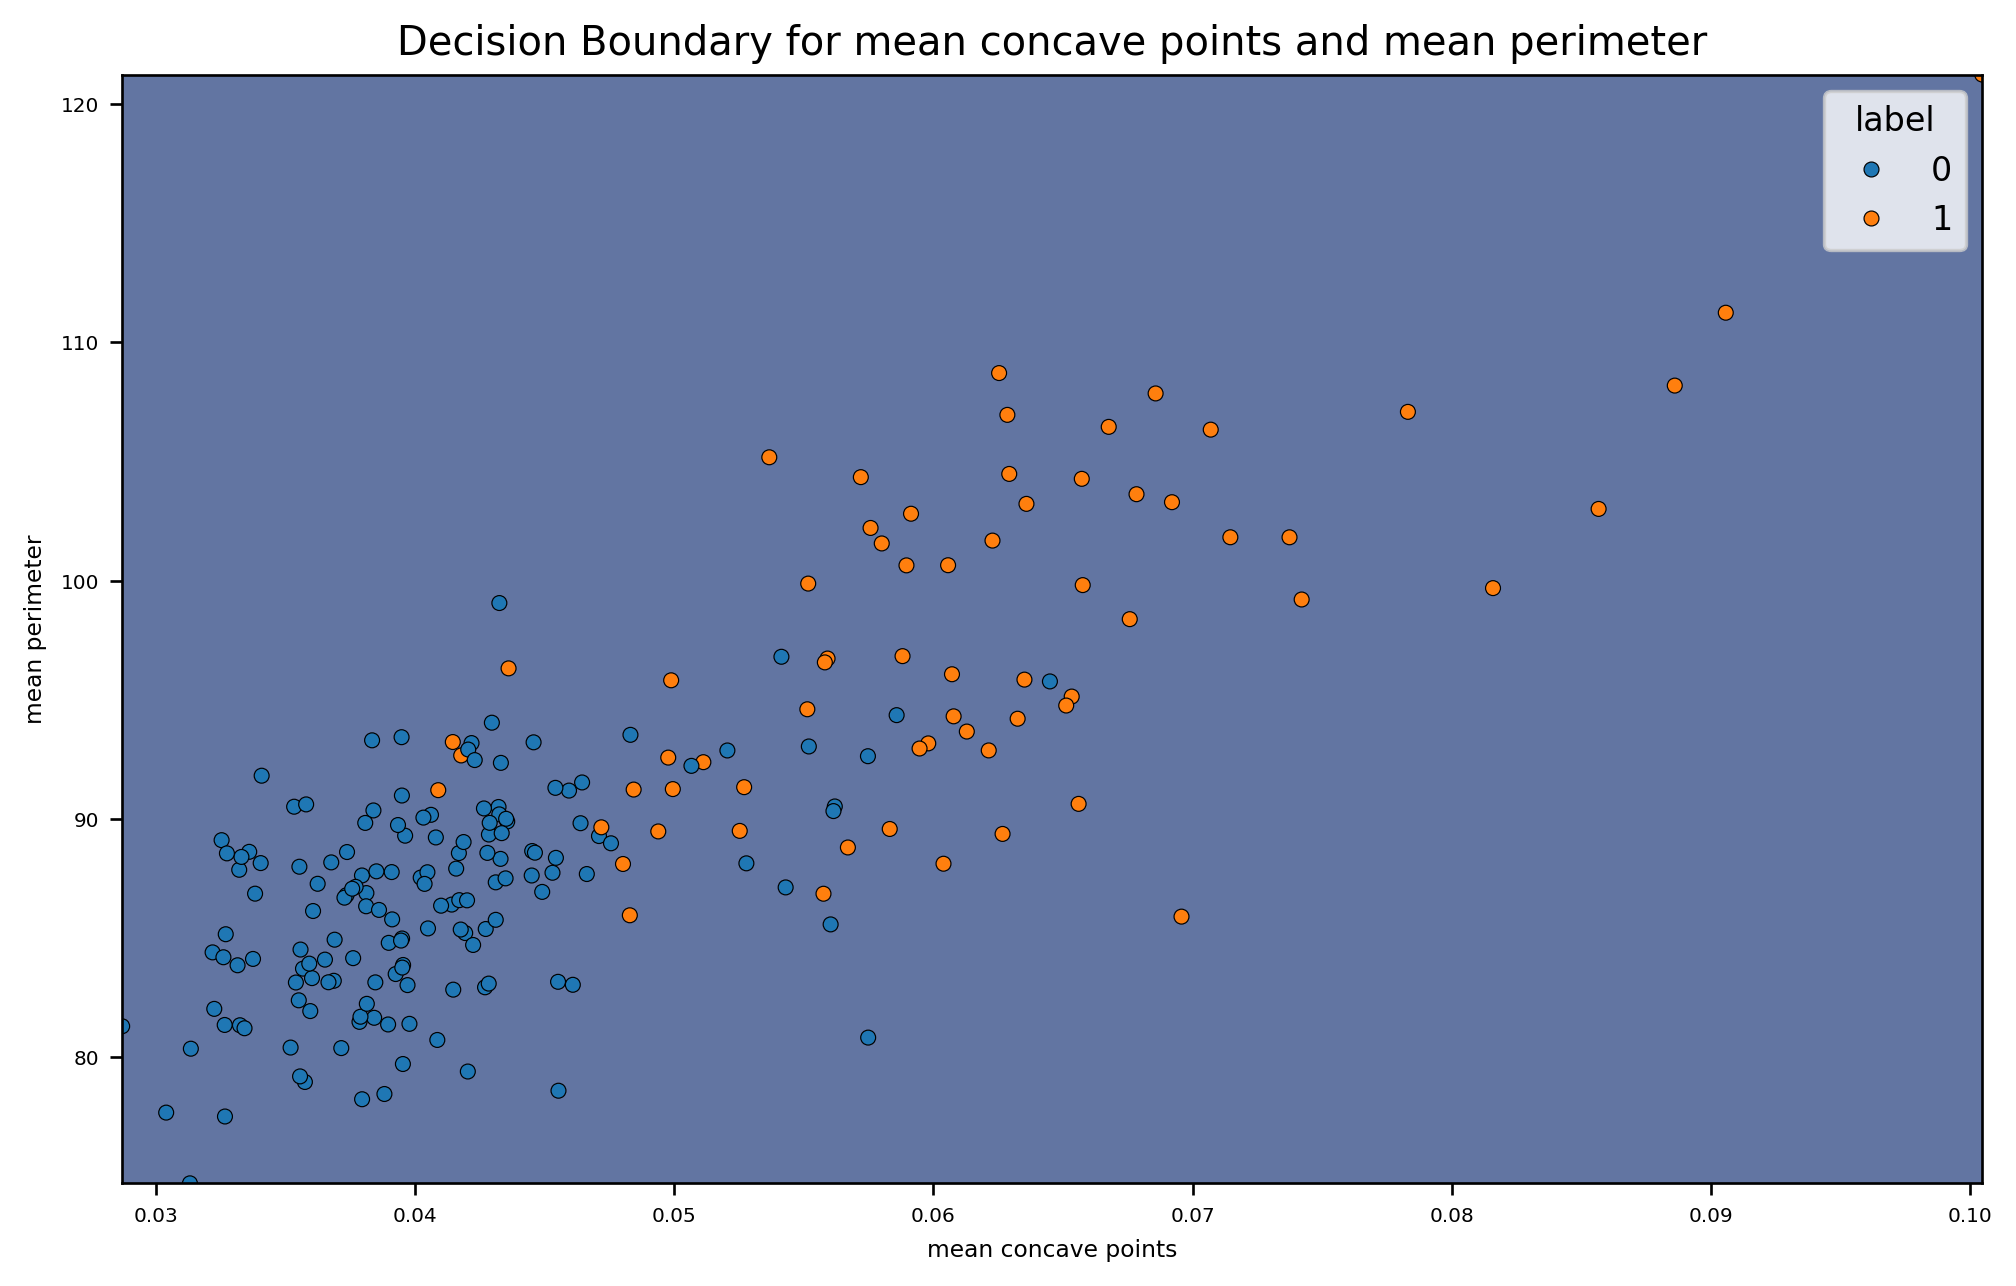

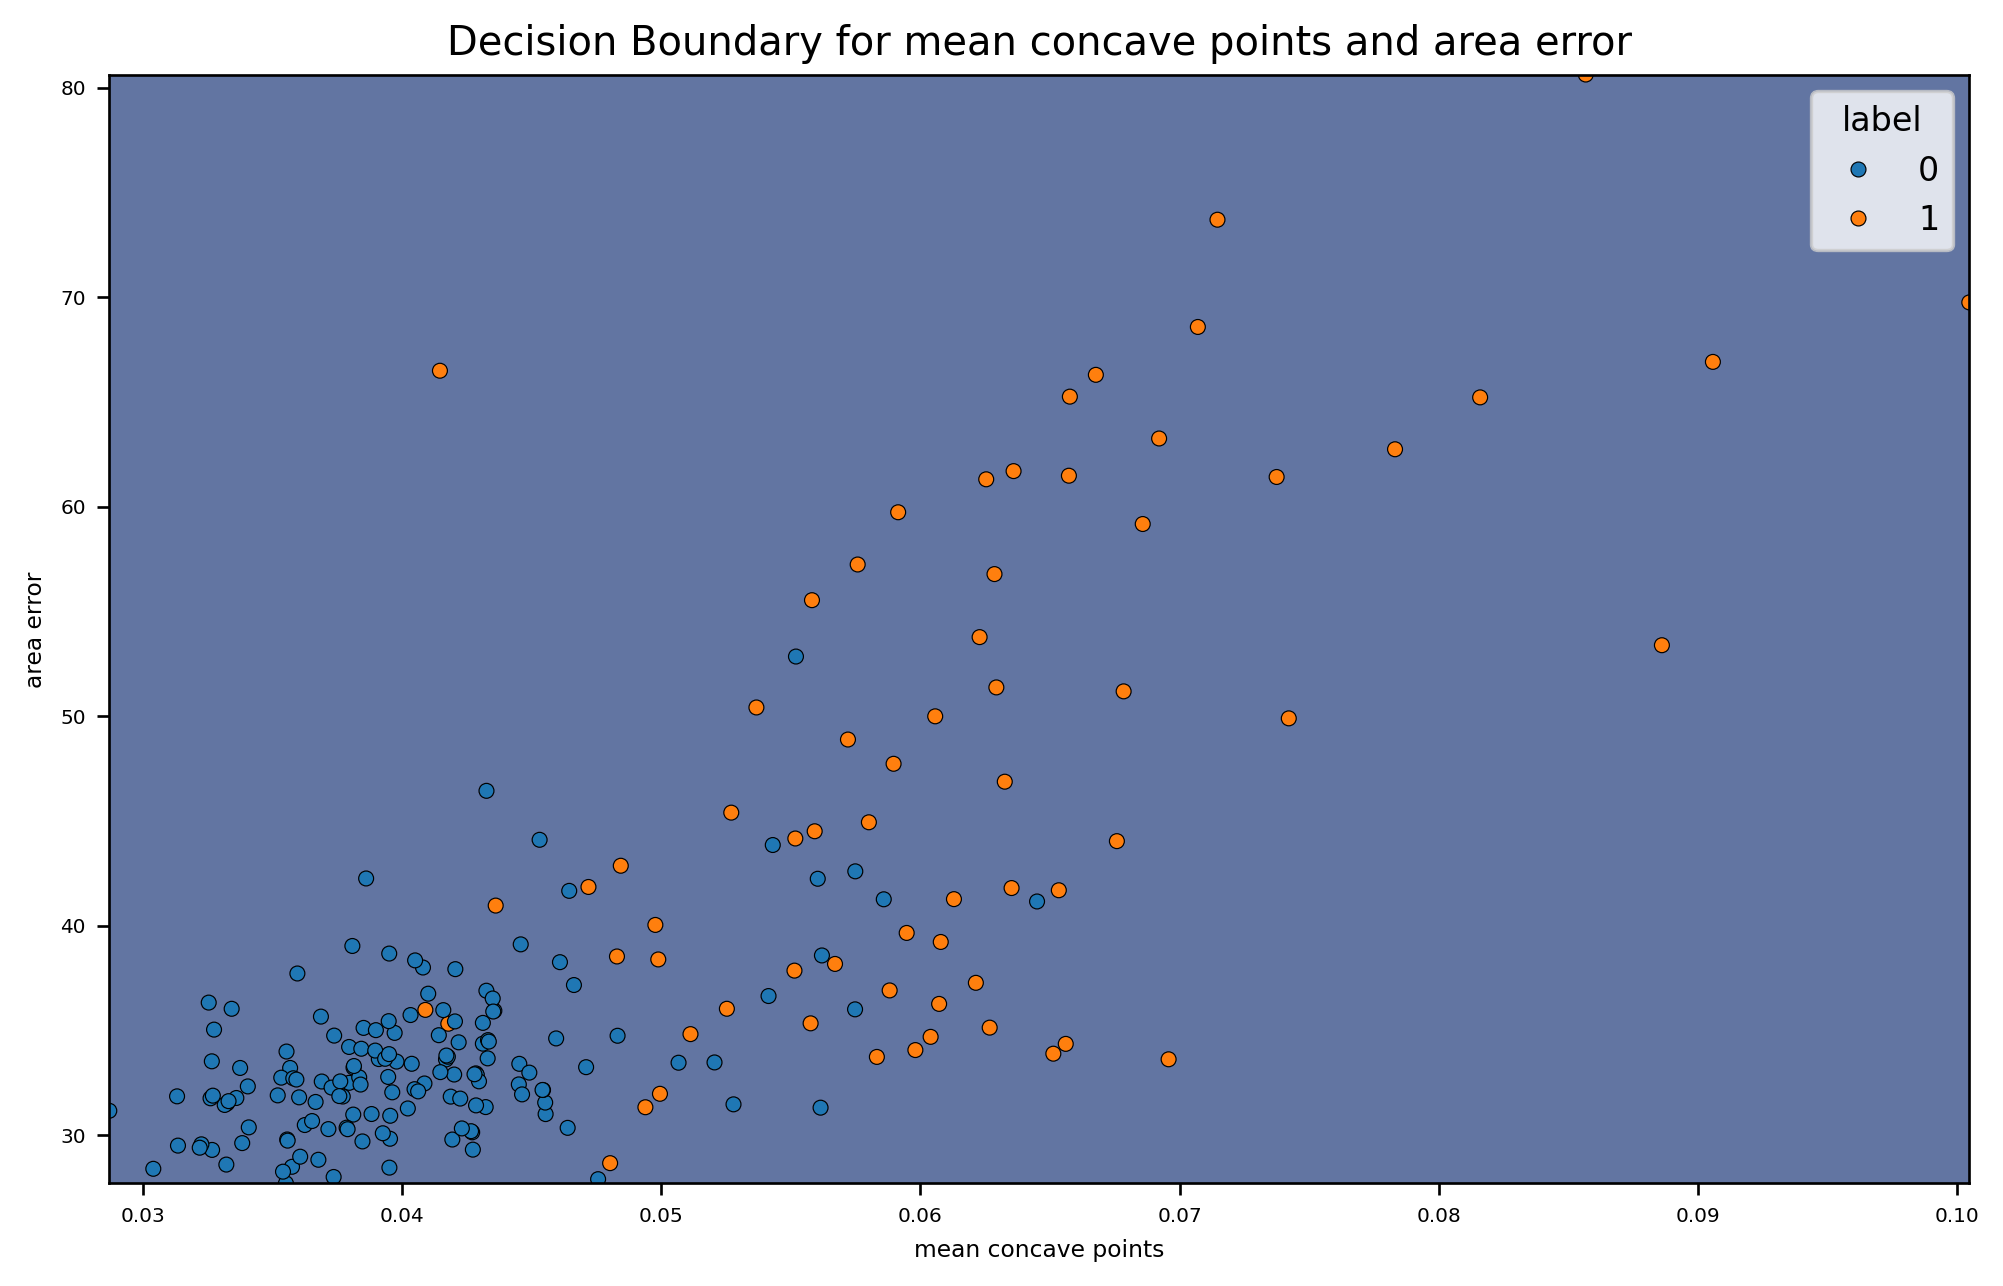

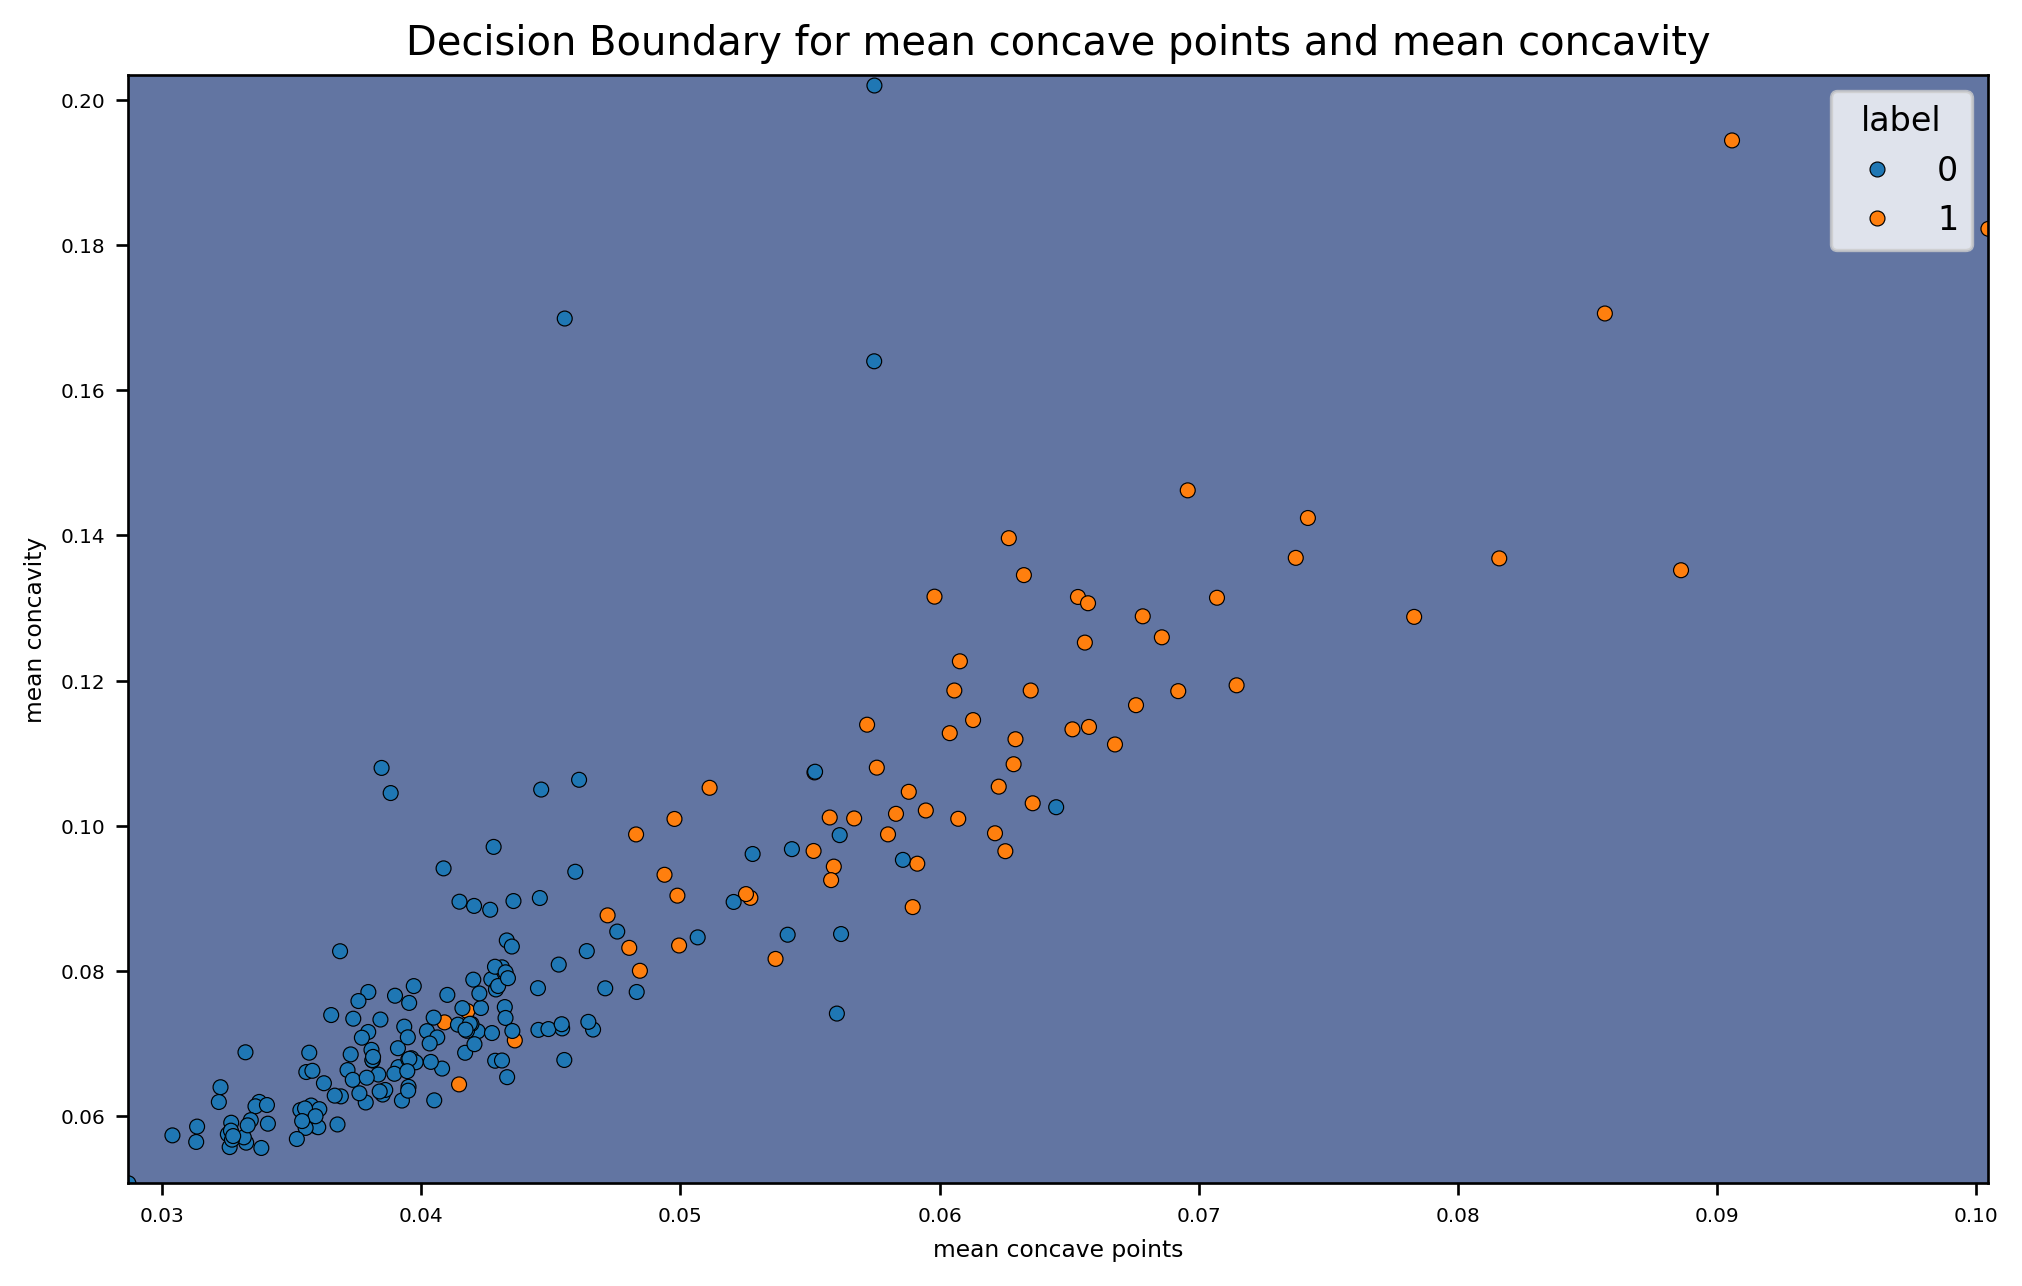

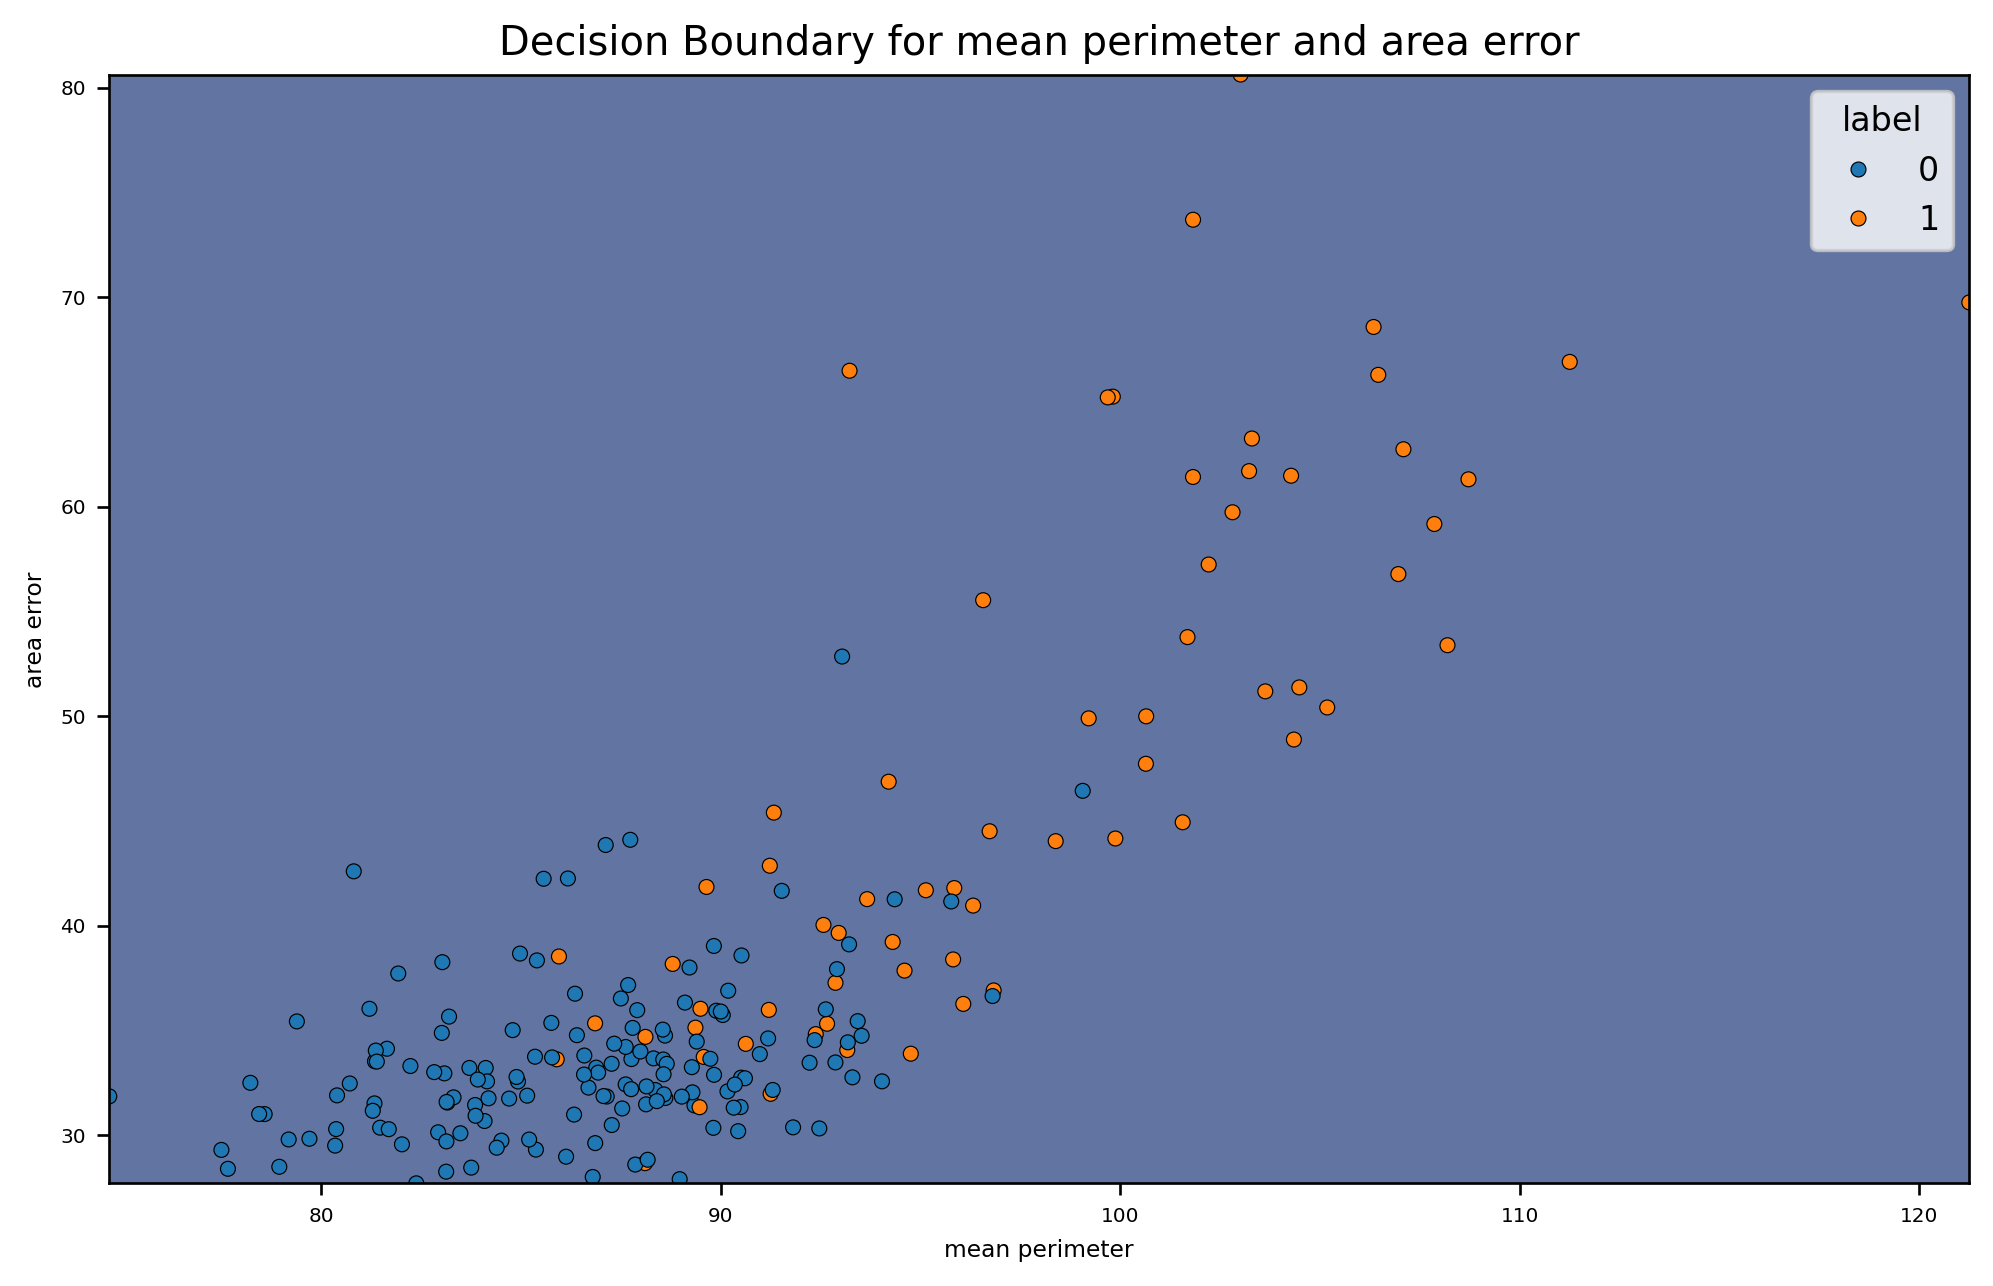

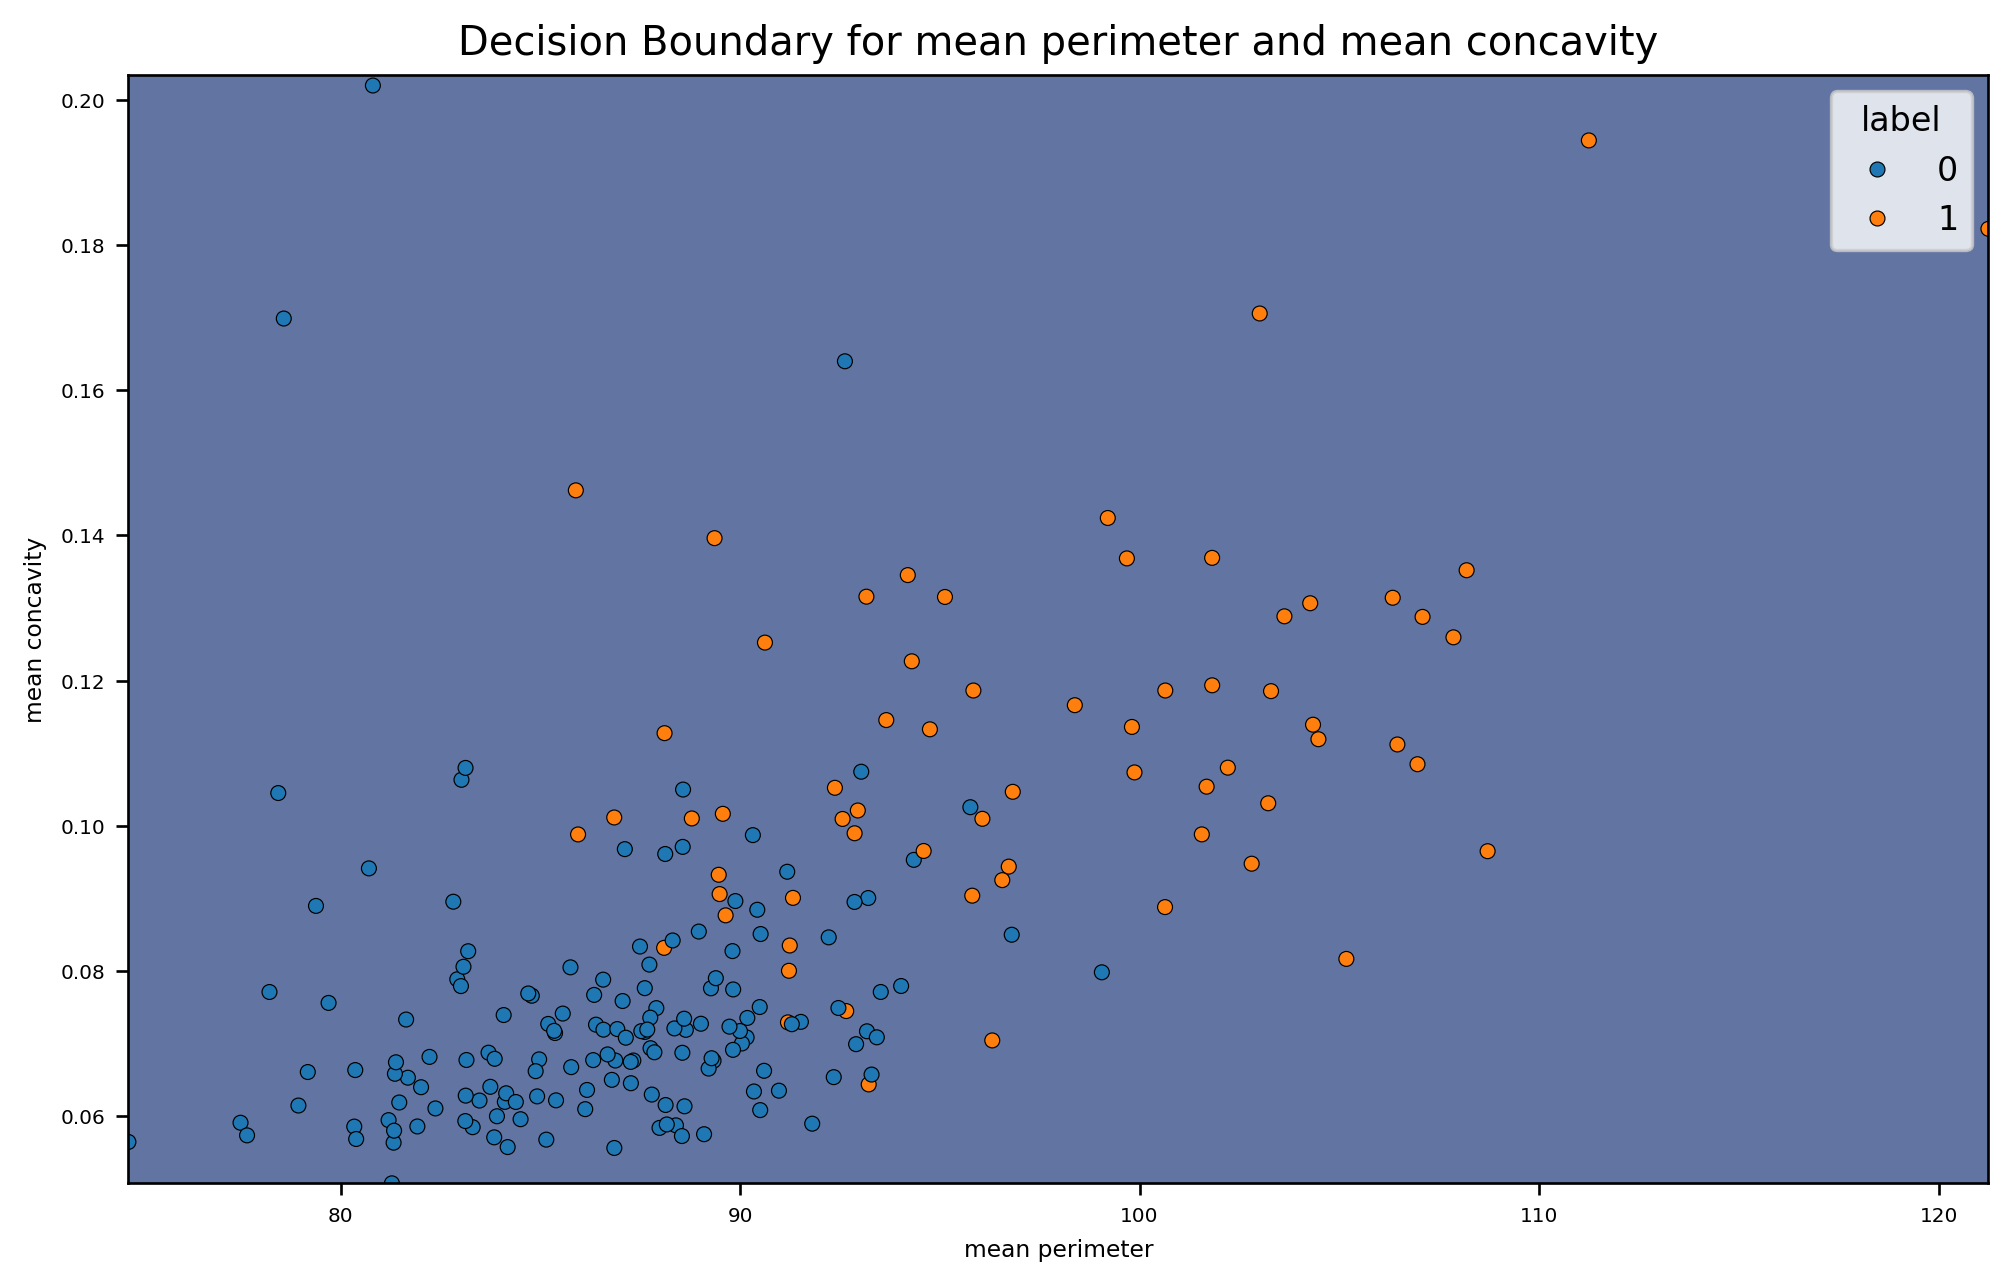

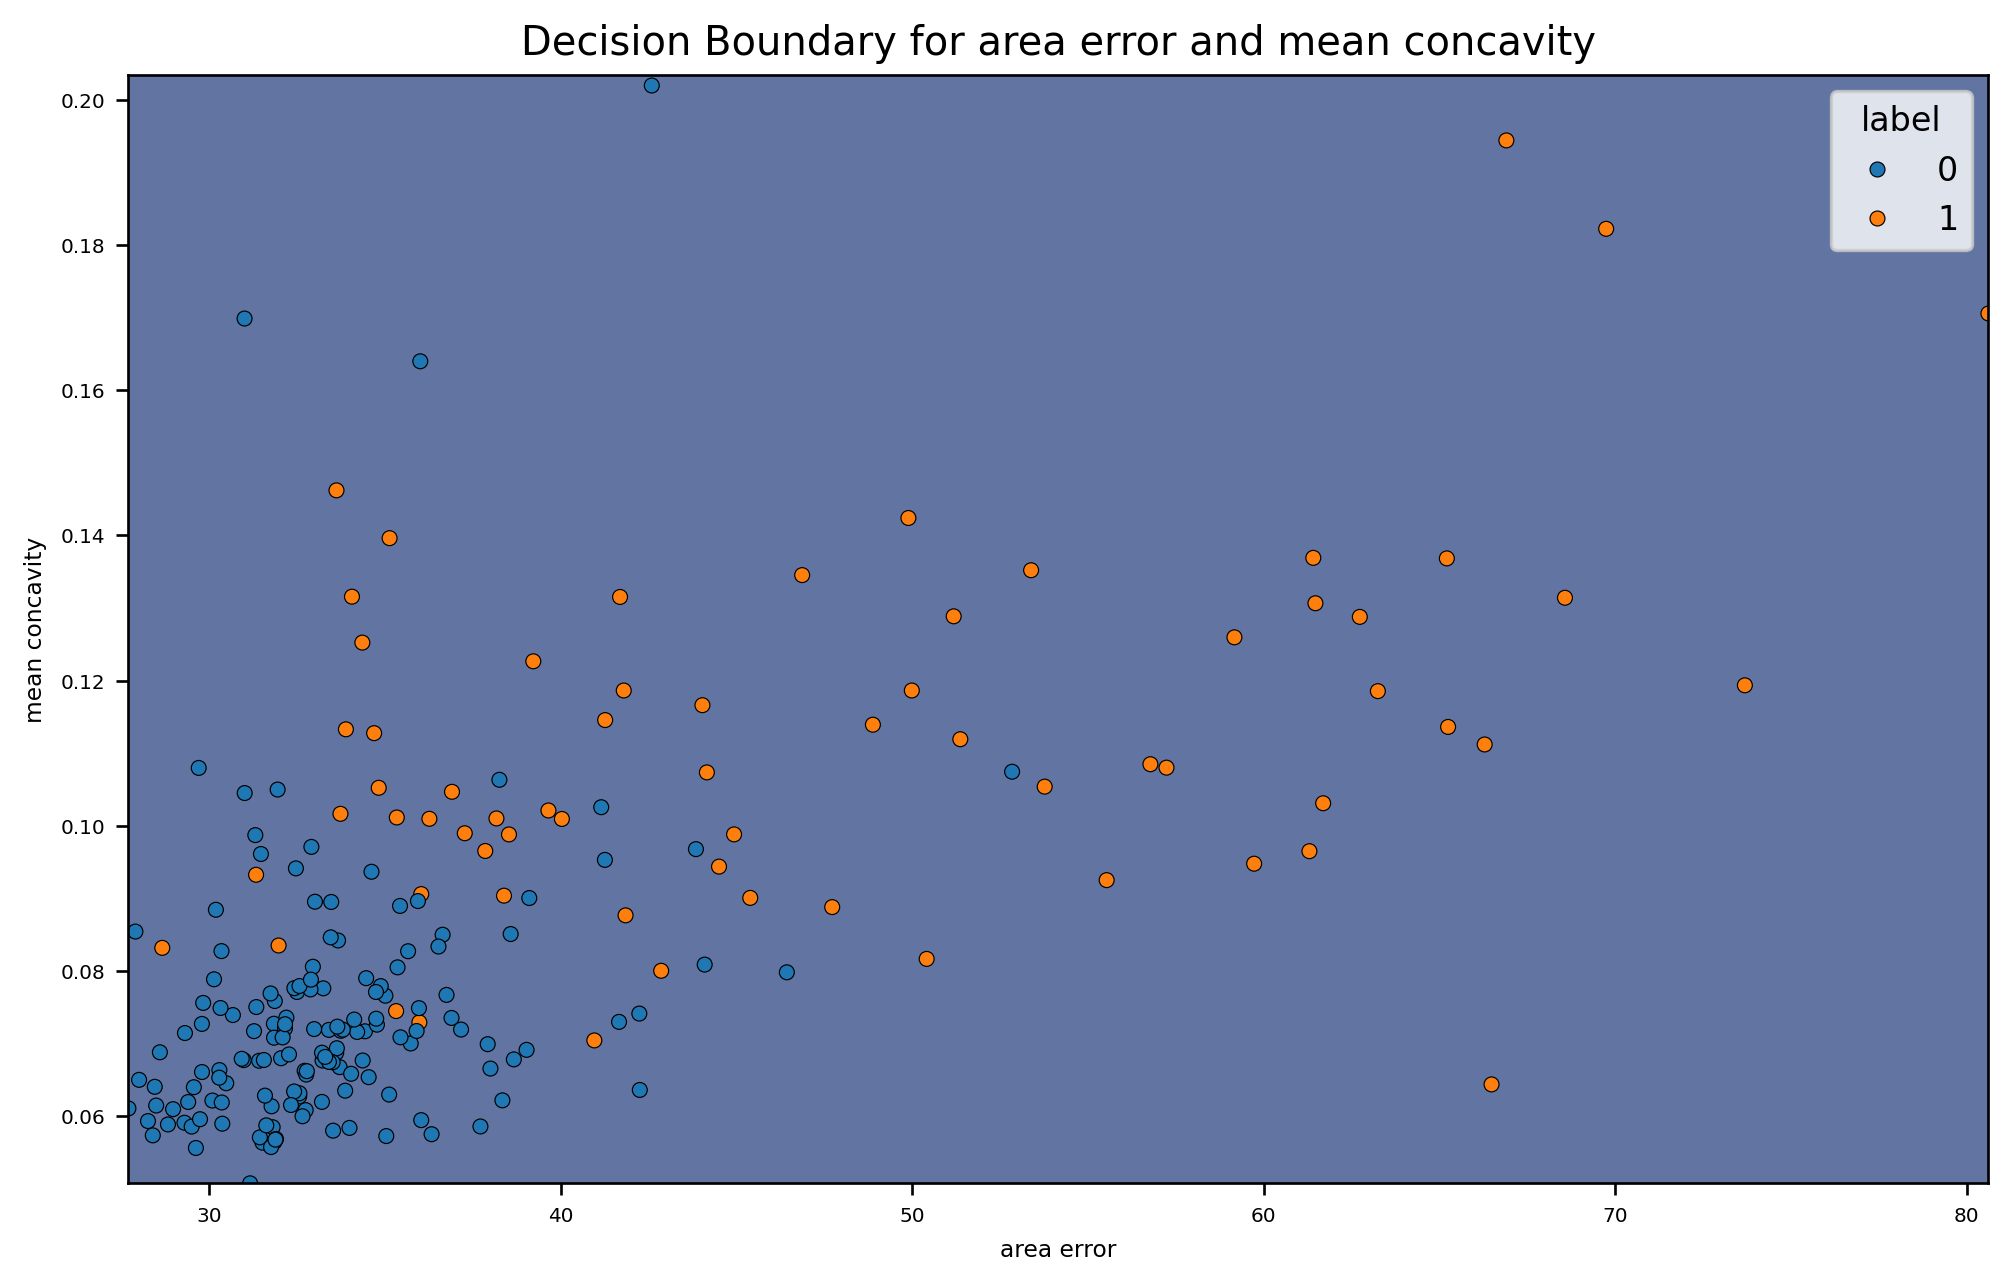

In [52]:
# Get mean values for all features
xmean = data_cleaned.drop(columns=['label']).mean().values

# Get the indices of the top 4 features
feature_indices = [data_cleaned.columns.get_loc(feature) for feature, _ in top_4_features]

# Train the RandomForestClassifier on the entire dataset
best_clf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200)
X = data_cleaned.drop(columns=['label'])
y = data_cleaned['label']
best_clf.fit(X, y)

# Plot decision boundaries for each pair of top 4 features
for i in range(len(top_4_features)):
    for j in range(i + 1, len(top_4_features)):
        feature1 = top_4_features[i][0]
        feature2 = top_4_features[j][0]

        # Create mesh grid for the two features
        xx, yy = make_meshgrid(data_cleaned[feature1], data_cleaned[feature2])

        # Plot decision boundaries
        plt.figure(figsize=(10, 6))
        plot_contours(best_clf, xx, yy, xmean, feature_indices[i], feature_indices[j], alpha=0.8)
        sns.scatterplot(x=data_cleaned[feature1], y=data_cleaned[feature2], hue=data_cleaned['label'], edgecolor='k', s=20)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'Decision Boundary for {feature1} and {feature2}')
        plt.show()

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

In [ ]:
# Answer here

The client's criteria are:

At least 90% probability of detecting malignant cancer when it is present (Recall or Sensitivity ≥ 90%).
No more than 1 in 5 healthy cases resulting in a false positive (False Positive Rate ≤ 20%).

Analysis of RandomForestClassifier:
Recall (Sensitivity): 85% (17 out of 20)
False Positive Rate (FPR): 2.17% (1 out of 46)

Conclusion:
The final model using RandomForestClassifier does not meet the client's criteria because the recall is 85%, which is below the required 90%. However, the false positive rate of 2.17% is well within the acceptable limit of 20%. To meet the client's specifications, further model tuning or different algorithms should be considered to increase the recall.